In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import matplotlib.pyplot as plt

In [25]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

## Load Model

In [2]:
rfModel = joblib.load('randomForestModel')

## Load Data

In [3]:
EUdata = pd.read_csv('EUCleaned.csv')

In [4]:
EUdataTest = EUdata[EUdata['clean_tweet'].notna()]

In [5]:
EUdataTest.shape

(2277, 8)

## Tfidf vectorizer

In [6]:
EUcorpus = []
for i in range(EUdataTest.shape[0]):
    EUcorpus.append(EUdataTest.iloc[i][3])

In [7]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(EUcorpus)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
EUdf2 = pd.DataFrame(denselist, columns=feature_names)
EUdf2

,000,10,100,1000,1000x,101,105,10th,11,12,...,zeggen,zero,zerschnitten,zie,zien,zijn,zine,zizo,zo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
EUPredict = rfModel.predict(EUdf2)

In [9]:
EUPredict

array([2, 2, 2, ..., 2, 2, 1])

In [10]:
EUdataFinal = EUdataTest[['text','retweet_count','favorite_count','Hash words','clean_tweet']]

In [11]:
EUdataFinal['indicator'] = EUPredict.tolist()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
EUdataFinal

,text,retweet_count,favorite_count,Hash words,clean_tweet,indicator
0,Nothing to do w/current subject but my pet hat...,0,0,No hashtags,"noth w/current subject pet hate, 1 many, ppl i...",2
2,"@Brehbander Nee, dat valt best mee. Want juist...",0,1,No hashtags,"nee, dat valt best mee. want juist die casusse...",2
3,@hqt__ @hack___man @blackvoices It is sensatio...,0,0,No hashtags,it sensat sinc deni everi day. white hate crim...,2
4,@DannyHackett @bexleynews Hate is a crime now.,0,0,No hashtags,hate crime now.,2
5,@aisssssse ce fut un hate crime ducoup 😢😢 mais...,0,1,No hashtags,ce fut un hate crime ducoup mai au moin notr r...,2
...,...,...,...,...,...,...
2336,@RivkahBrown @Samfr @ING Question hun. Are you...,0,0,No hashtags,question hun. are clinic insan take drugs? cal...,2
2337,@michaeljswalker Scott Adkins interviews marti...,0,0,No hashtags,scott adkin interview martial art star said an...,2
2338,It is so brutally painful to want to make/eat ...,0,0,No hashtags,it brutal pain want make/eat asian food store ...,2
2339,Update: The black male suspect in the anti-Asi...,231,1583,No hashtags,update: the black male suspect anti-asian atta...,2


In [13]:
EUdataFinal['tweet_status'] = EUdataFinal.indicator.apply(lambda x : 'Neutral' if x == 2 else ('Offensive' if x == 1 else 'hate speech'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
EUdataFinal

,text,retweet_count,favorite_count,Hash words,clean_tweet,indicator,tweet_status
0,Nothing to do w/current subject but my pet hat...,0,0,No hashtags,"noth w/current subject pet hate, 1 many, ppl i...",2,Neutral
2,"@Brehbander Nee, dat valt best mee. Want juist...",0,1,No hashtags,"nee, dat valt best mee. want juist die casusse...",2,Neutral
3,@hqt__ @hack___man @blackvoices It is sensatio...,0,0,No hashtags,it sensat sinc deni everi day. white hate crim...,2,Neutral
4,@DannyHackett @bexleynews Hate is a crime now.,0,0,No hashtags,hate crime now.,2,Neutral
5,@aisssssse ce fut un hate crime ducoup 😢😢 mais...,0,1,No hashtags,ce fut un hate crime ducoup mai au moin notr r...,2,Neutral
...,...,...,...,...,...,...,...
2336,@RivkahBrown @Samfr @ING Question hun. Are you...,0,0,No hashtags,question hun. are clinic insan take drugs? cal...,2,Neutral
2337,@michaeljswalker Scott Adkins interviews marti...,0,0,No hashtags,scott adkin interview martial art star said an...,2,Neutral
2338,It is so brutally painful to want to make/eat ...,0,0,No hashtags,it brutal pain want make/eat asian food store ...,2,Neutral
2339,Update: The black male suspect in the anti-Asi...,231,1583,No hashtags,update: the black male suspect anti-asian atta...,2,Neutral


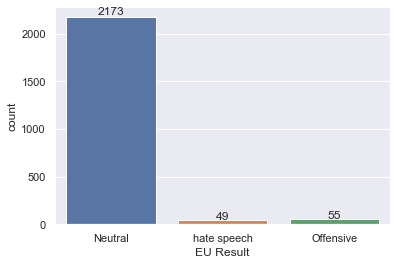

In [26]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="tweet_status", data=EUdataFinal)
ax.set(xlabel='EU Result')
show_values(ax)

In [16]:
pd.options.display.max_colwidth = 500

EUdataFinaloffensive = EUdataFinal['text'].loc[EUdataFinal['tweet_status'] == 'offensive']

In [17]:
EUdataFinaloffensive


Series([], Name: text, dtype: object)

In [18]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("RT")

print(type(STOPWORDS))

import random

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 344
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

<class 'set'>


In [19]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(EUdataFinal.loc[EUdataFinal["tweet_status"]=="hate speech"].clean_tweet))

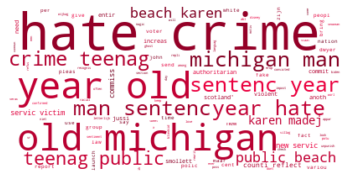

In [20]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

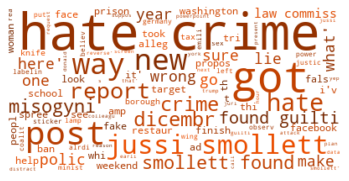

In [21]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 20
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(EUdataFinal.loc[EUdataFinal["tweet_status"]=="Offensive"].clean_tweet))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

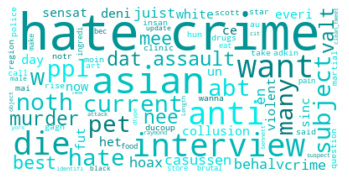

In [22]:
stopwords.add("Name")

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 180
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(EUdataFinal.loc[EUdataFinal["tweet_status"]=="Neutral"].clean_tweet))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()